#### <span style="color:#a50e3e;">Example 3. </span> Nonlinear regression using single layer units

Here we repeat a nonlinear regression first shown in Section 12.5 using the dataset shown below, but employing the `feature_transforms` function developed above for single layer units.

<IPython.core.display.Javascript object>


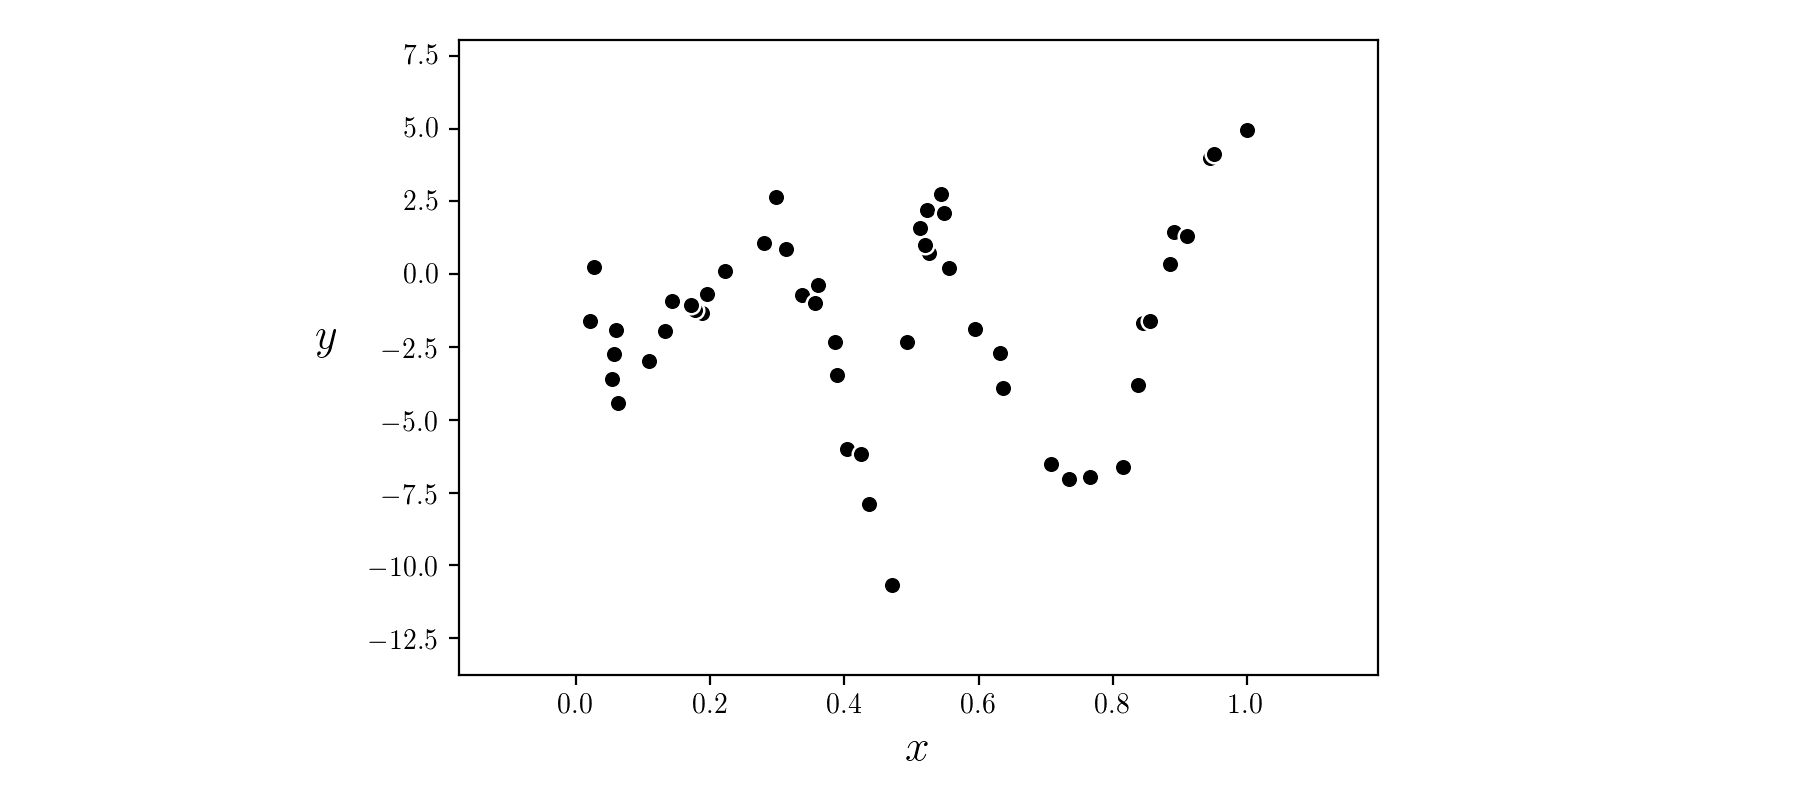

In [6]:
## This code cell will not be shown in the HTML version of this notebook
# load data
csvname = datapath + 'universal_regression_samples_0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# load input/output data
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo1 = regress_plotter.Visualizer(data)
demo1.plot_data()

Here we use $U_1 = 100$ units, the `tanh` activation, and make a run of $5,000$ steps of gradient descent with $\alpha = 10^{-1}$ to fit all of model parameters.  Note that in order to initialize our model we need to create a list whose first entry contains the weights of our final linear combination, and whose second entry contains our array of internal weights - which we show below.

In [7]:
# define the number fo units to use
U_1 = 100     # number of single layer units to employ
N = 1         # dimension of input

# initialize internal weights of our single layer units
W_1 = 0.1*np.random.randn(N+1,U_1)

# initialize weights of our linear combination
w_2 = 0.1*np.random.randn(U_1+1,N)

# package weights together
w = [W_1,w_2]

With our run complete can then plot the resulting fit to the data, as shown below, which fits the data quite well. 

<IPython.core.display.Javascript object>


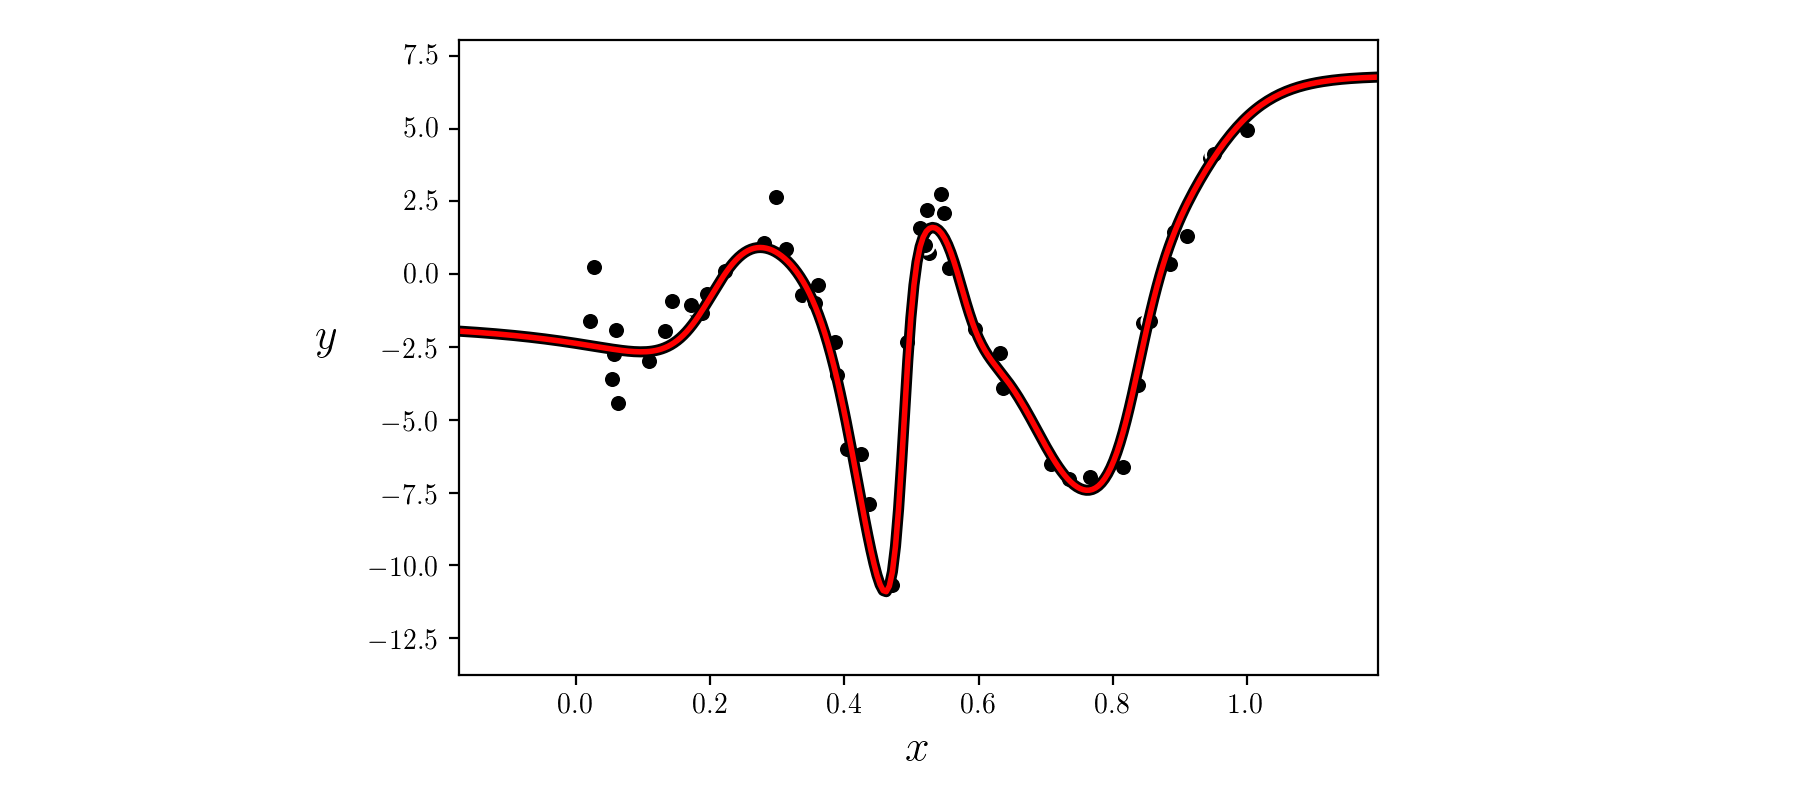

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# initialize with input/output data
mylib1 = multi.basic_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib1.preprocessing_steps(normalizer = 'standard')

# split into training and validation sets
mylib1.make_train_val_split(train_portion = 1)

# choose cost
mylib1.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
layer_sizes = [100]
mylib1.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh',scale = 0.1)

# fit an optimization
mylib1.fit(max_its = 5000,alpha_choice = 10**(-1),verbose = False)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = np.argmin(mylib1.train_cost_histories[0])
w_best = mylib1.weight_histories[0][ind]
demo1 = regress_plotter.Visualizer(data)
demo1.plot_fit(w_best,mylib1.model,normalizer = mylib1.normalizer);

#### <span style="color:#a50e3e;">Example 4. </span> Learning a nonlinear autoencoder using single layer units

In this example we learn a nonlinear manifold for the dataset shown below using an `encoder` and `decoder` models, each consisting of $U_1 = 10$ single layer `tanh` units.  To see how both encoding/decoding schemes mimic our `model` functionality see Section 12.4, where the notion of a nonlinear encoder was introduced.

<IPython.core.display.Javascript object>


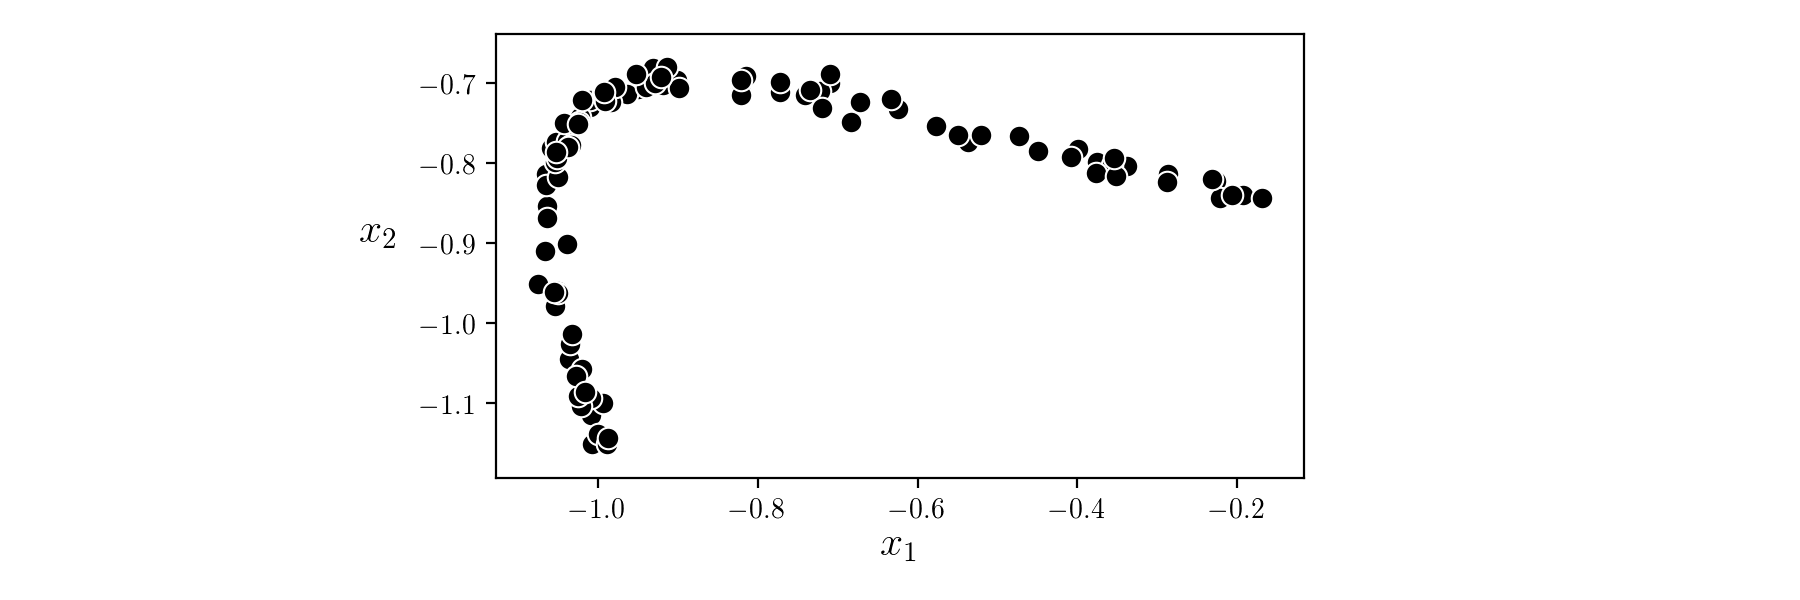

In [9]:
# This code cell will not be shown in the HTML version of this notebook
# import data
X = np.loadtxt(datapath + 'universal_autoencoder_samples_0.csv',delimiter=',')

# scatter dataset
fig = plt.figure(figsize = (9,3))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0,labelpad = 15);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')
plt.show()

Using our `feature_transforms` function for both encoding and decoding functions we make a run of  $1,000$ steps of gradient descent with $\alpha = 10^{-1}$ to fit all of autoencoder's parameters.  Note that in order to initialize our model we need to create a list whose first entry contains the weights of our final linear combination, and whose second entry contains our array of internal weights - for each of the encoding and decoding functions precisely as we did in the previous example.

With our run complete can then plot the resulting nonlinear manifold fit to the data, as shown below, which represents the data quite well.  In the bottom panel we illustrate how - once trained - the points in this space gravitate towards the learned autoencoder.

<IPython.core.display.Javascript object>


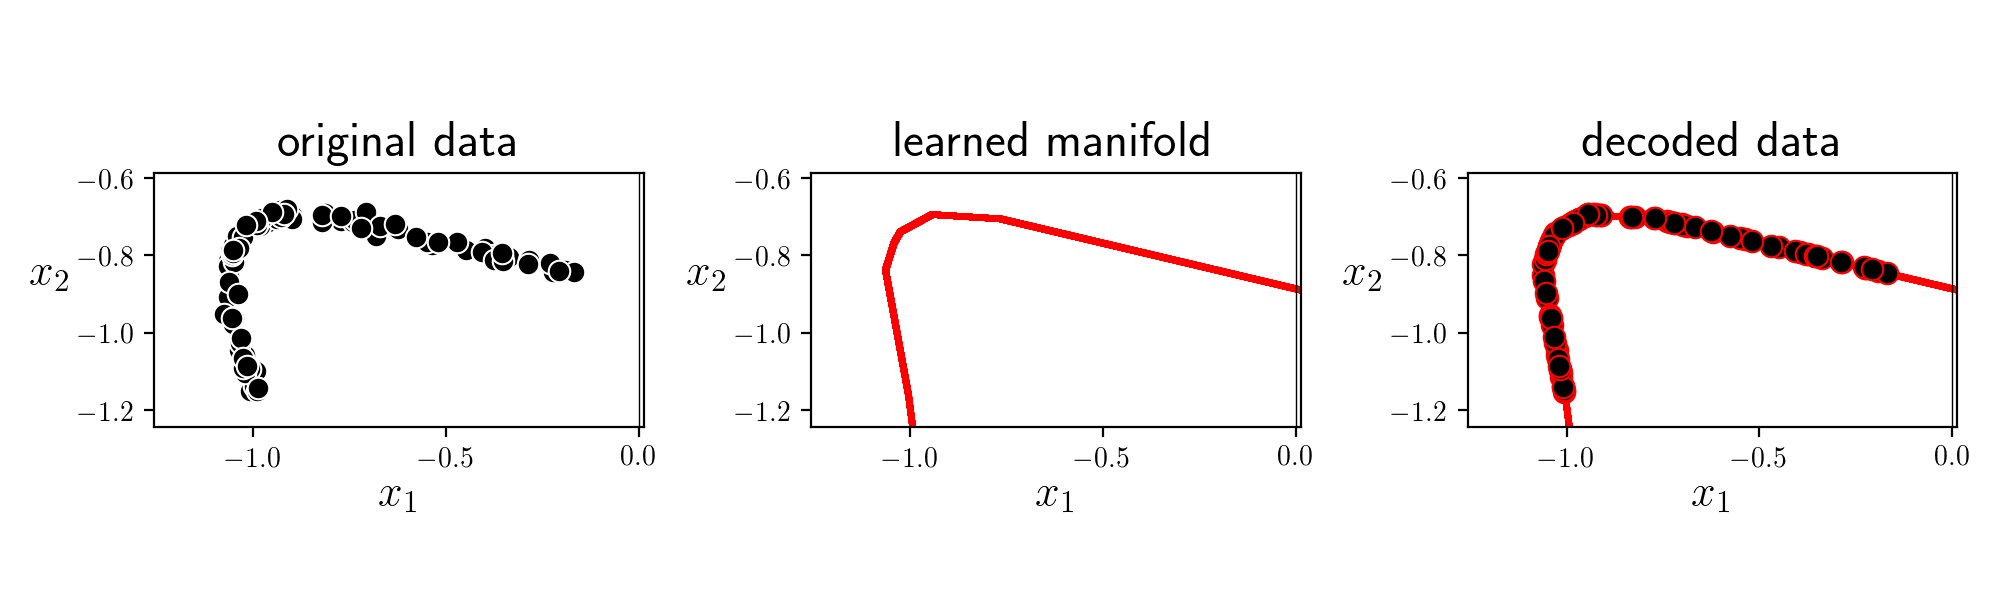

(2,)


<IPython.core.display.Javascript object>


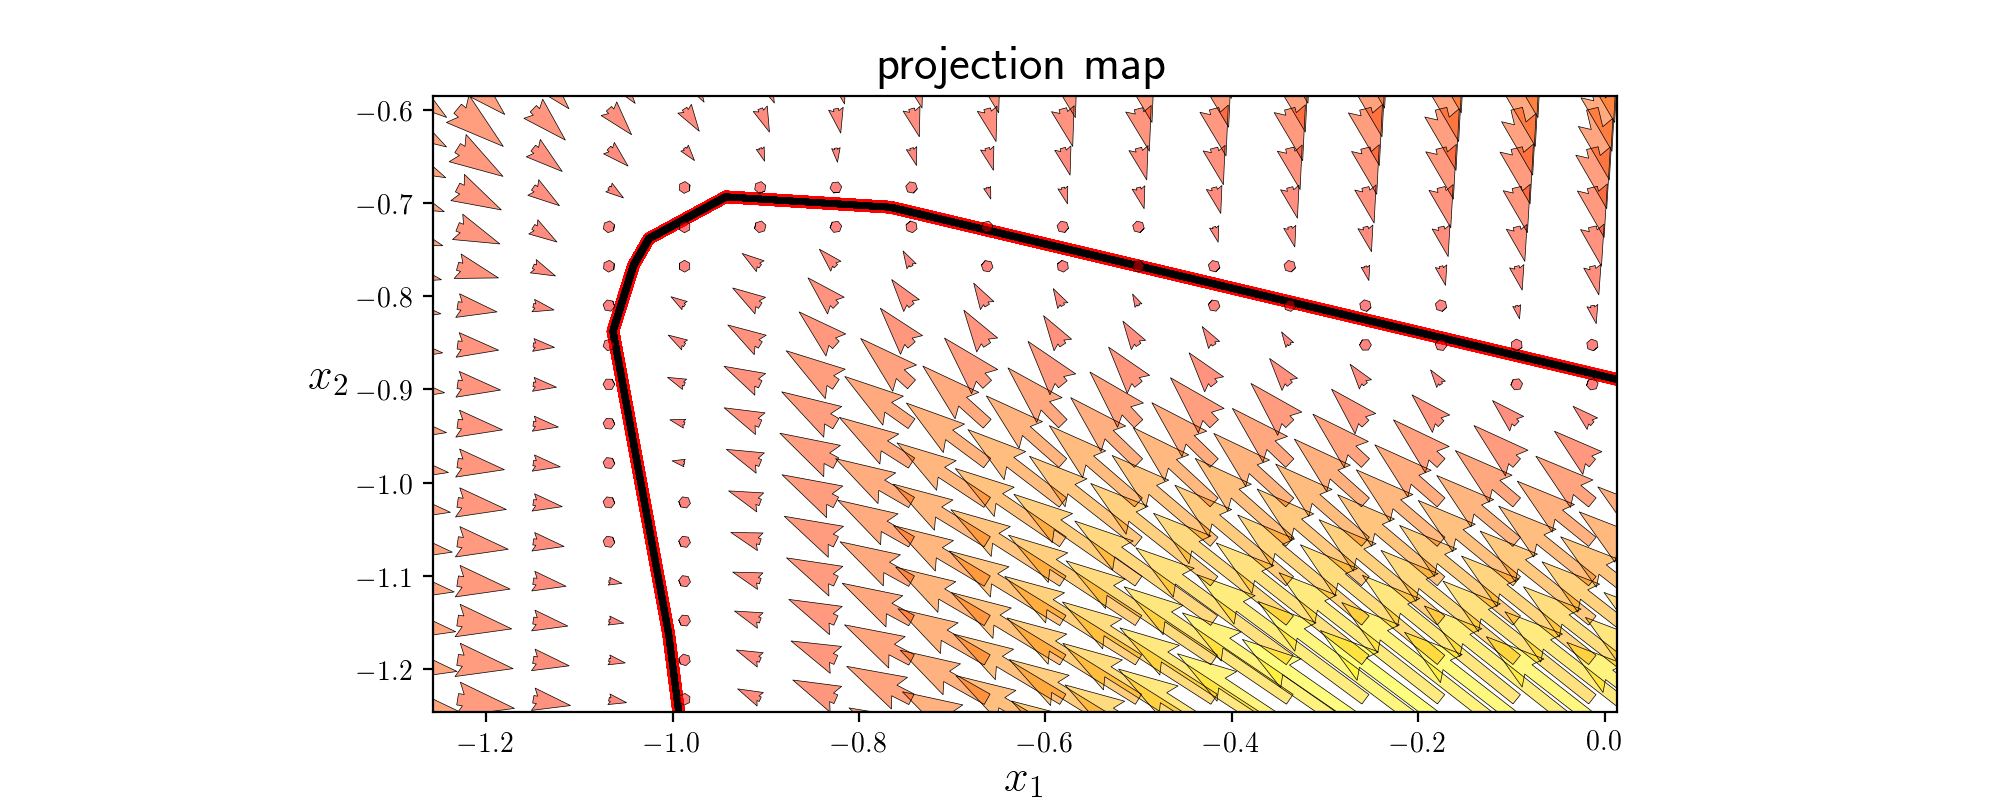

In [118]:
# This code cell will not be shown in the HTML version of this notebook
# create instance of library
mylib2 = multi.basic_lib.unsuper_setup.Setup(X)

# perform preprocessing step(s) - especially input normalization
mylib2.preprocessing_steps(normalizer = 'standard')

# split into training and validation sets
mylib2.make_train_val_split(train_portion = 1)

# choose features
mylib2.choose_encoder(layer_sizes = [2,10,1],scale = 0.2)
mylib2.choose_decoder(layer_sizes = [1,10,2],scale = 0.2)

# choose cost
mylib2.choose_cost(name = 'autoencoder')

# fit an optimization
mylib2.fit(max_its = 1000,alpha_choice = 10**(-1),verbose = False)

# plot results
multi.autoencoder_demos.show_encode_decode(X,mylib2,projmap = True,scale = 10)

#### <span style="color:#a50e3e;">Example 9. </span>  Nonlinear regression using multilayer perceptrons

In this example we demonstrate the usage of the ``Python`` functionality below to create an arbitrary feedforward network architecture to perform nonlinear regression using the toy dataset below.

<IPython.core.display.Javascript object>


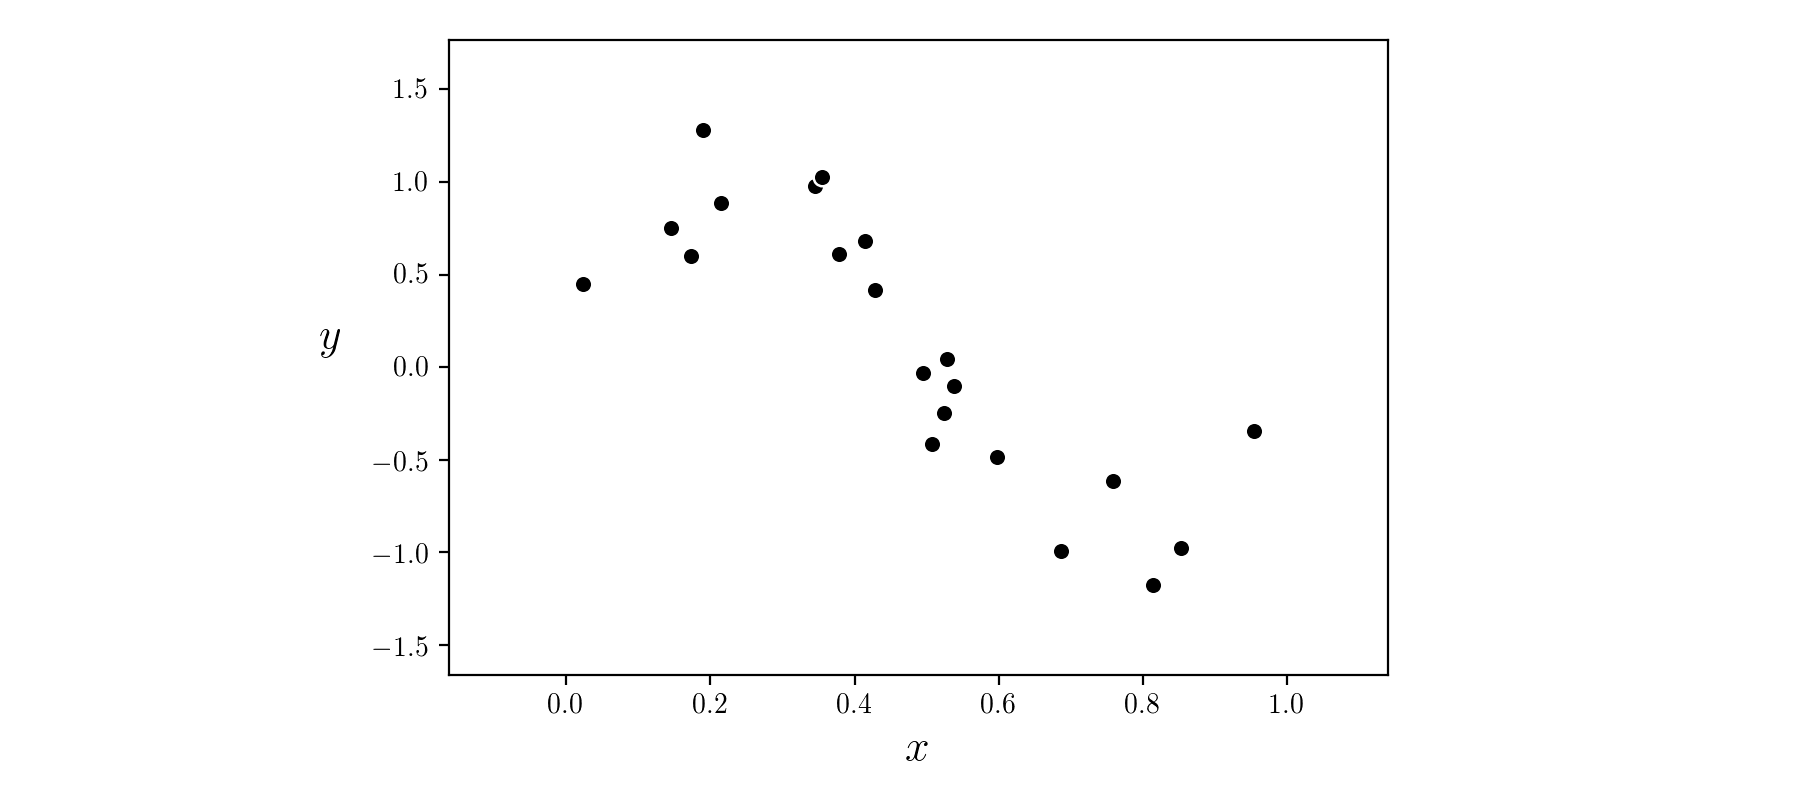

In [157]:
# This code cell will not be shown in the HTML version of this notebook
# load data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo4 = regress_plotter.Visualizer(data)
demo4.plot_data()

Here we will use a 3 layer network with 10 units in each layer (we chose the number of units in each layer arbitrarily here).  This will certainly overfit the dataset if we tune the parameters well!

In the next Python cell we create the handle list ``layer_sizes`` for our network and generate the initial weights.

In [ ]:
# An example 4 hidden layer network, with 10 units in each layer
N = 1  # dimension of input
M = 1  # dimension of output
U_1 = 10; U_2 = 10; U_3 = 10; U_4 = 10;  # number of units per hidden layer

# the list defines our network architecture
layer_sizes = [N, U_1,U_2,U_3,U_4,M]

# generate initial weights for our network
w = initialize_network_weights(layer_sizes, scale = 0.5)

With all of our weights initialized we can then use gradient descent to tune them properly (here we used the normalized version).  Below we define our ``least_squares`` cost function and run normalized gradient descent for 5000 iterations using a fixed steplength parameter $\alpha = 10^{-1}$.  We can then examine the cost function history to make sure gradient descent is converging properly.

<IPython.core.display.Javascript object>


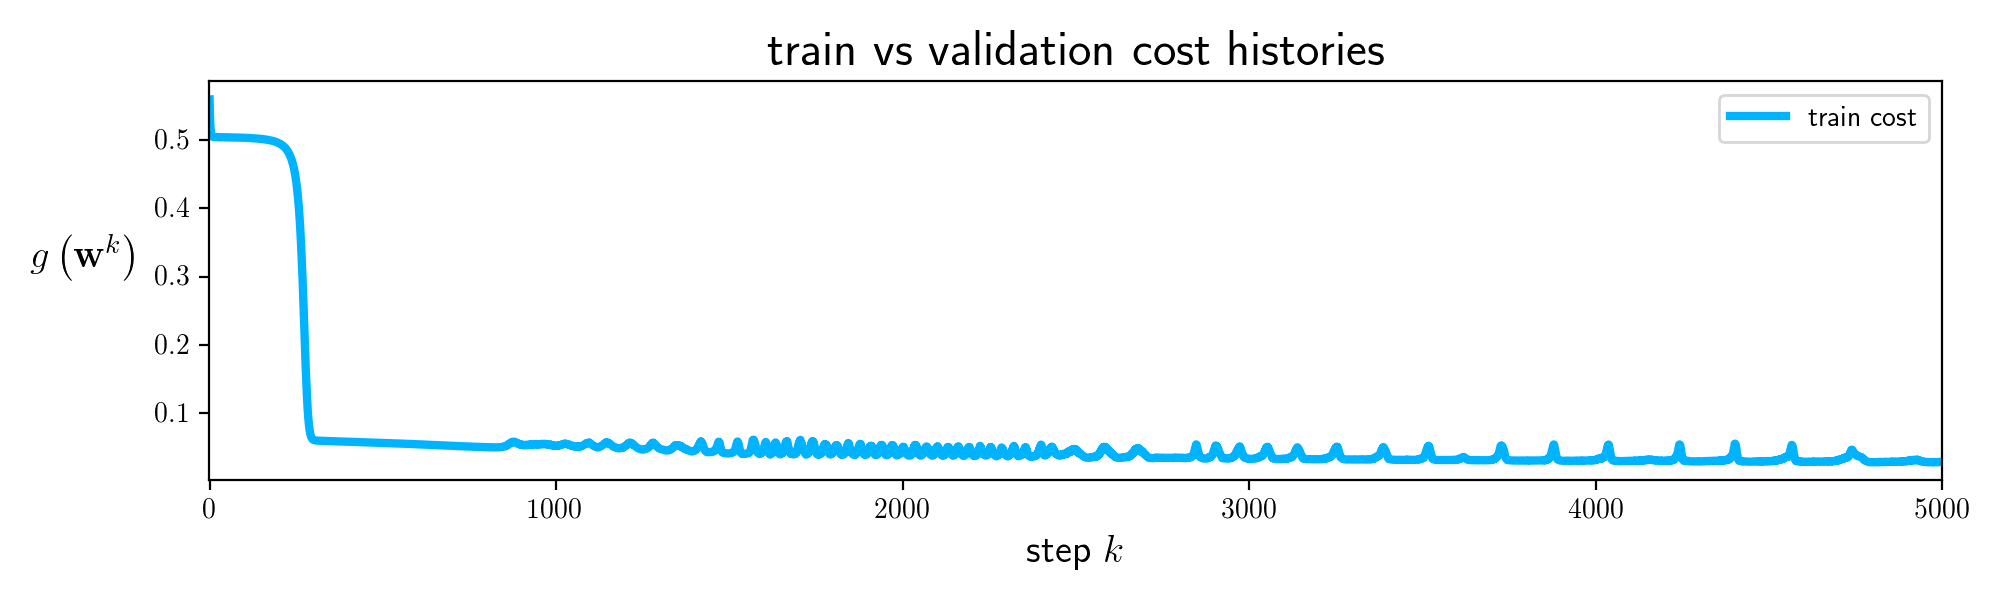

In [169]:
# This code cell will not be shown in the HTML version of this notebook
# initialize with input/output data
mylib4 = multi.basic_lib.super_setup.Setup(x,y)

# perform preprocessing step(s) - especially input normalization
mylib4.preprocessing_steps(normalizer = 'standard')

# split into training and validation sets
mylib4.make_train_val_split(train_portion = 1)

# choose cost
mylib4.choose_cost(name = 'least_squares')

# choose dimensions of fully connected multilayer perceptron layers
layer_sizes = [10,10,10,10]
mylib4.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'relu',scale = 0.1)

# fit an optimization
mylib4.fit(max_its = 5000,alpha_choice = 10**(-1),verbose = False)

# plot cost function history
mylib4.show_histories()

The cost function plot looks good!  Taking the final weight from our history we can then evaluate testing points through our ``model`` function.  In particular we can illustrate our nonlinear prediction - which we do below.  We certainly do overfit, but this is not a surprise since our network is so flexible (and we optimized it quite well).

<IPython.core.display.Javascript object>


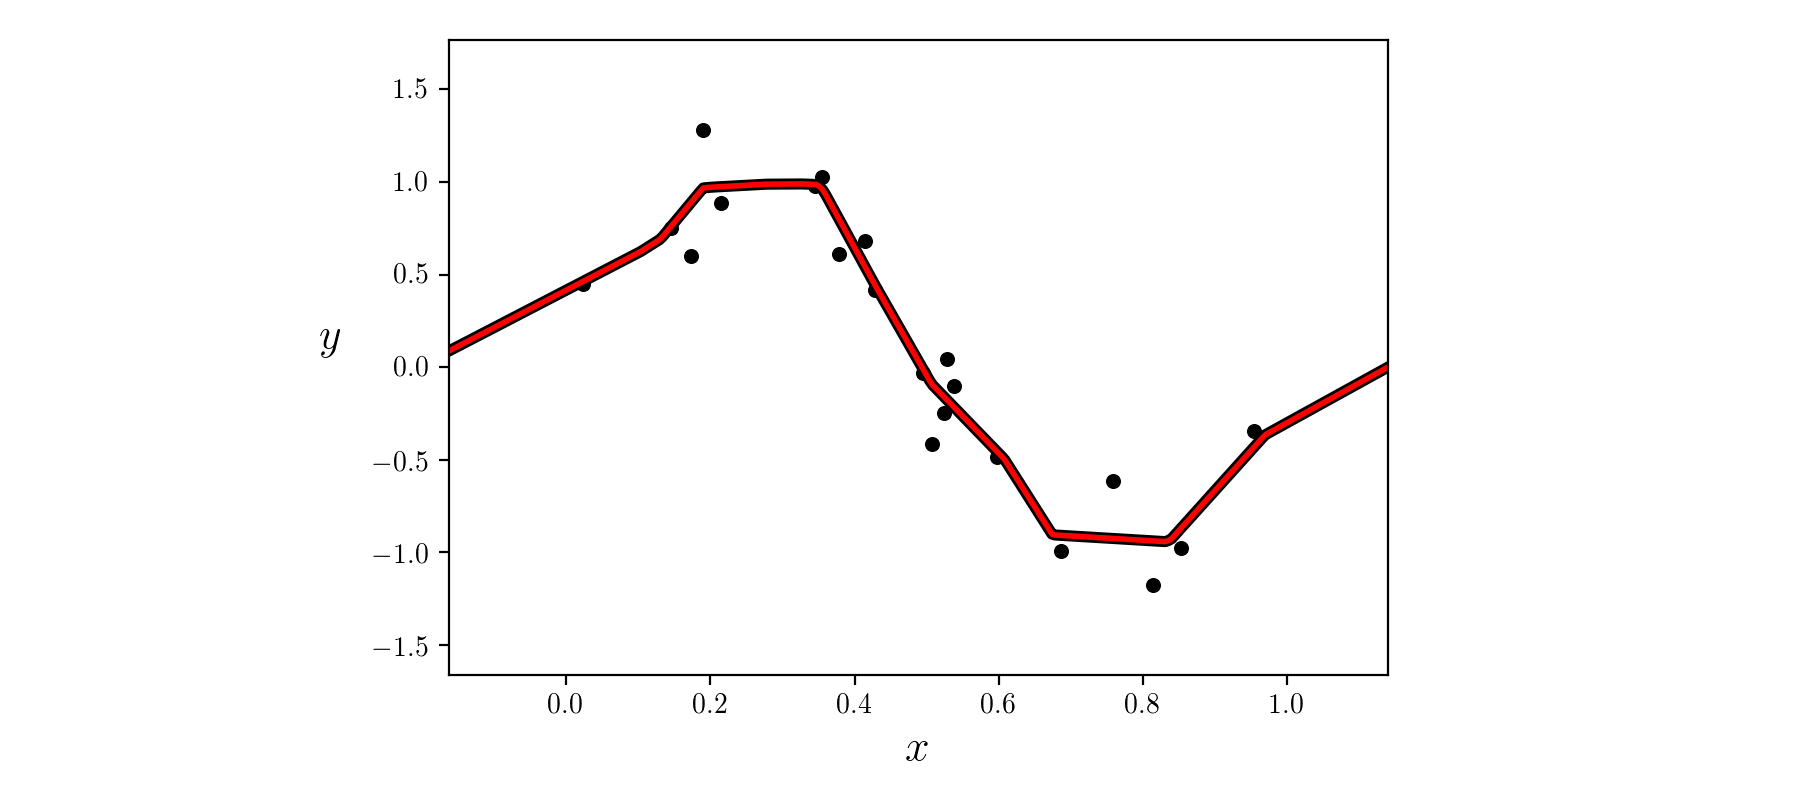

In [170]:
# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = np.argmin(mylib4.train_cost_histories[0])
w_best = mylib4.weight_histories[0][ind]
demo4 = regress_plotter.Visualizer(data)
demo4.plot_fit(w_best,mylib4.model,normalizer = mylib4.normalizer);

#### <span style="color:#a50e3e;">Example 3. </span>  Bacterial growth

In this example and in the left panel of slider widget below we show a real regression dataset consisting of $P=9$ data points corresponding to the normalized cell concentration (output, $y$) of a particular bacteria, *Lactobacillus delbrueckii*, in spatially constrained laboratory conditions over the period of $24$ hours (input, $x$).

Also shown in the left panel are two sigmoidal fits (shown in magenta and green) of the form 

\begin{equation}
y(x) = \sigma \left(w_0 + w_1 x \right)
\end{equation}

where the parameters $w_0$ and $w_1$ of each are found via minimizing a Least Squares cost using gradient descent, initialized at two different points.


In the right panel we show the surface of the cost function which is clearly non-convex, having stationary points in the large flat region colored orange as well as a global minimum in the long narrow valley highlighted in dark blue. Two paths taken by initializing gradient descent at different values are shown in magenta and green, respectively, on the surface itself. 

While the initialization of the magenta path in the yellow-green area of the surface leads to the global minimum, which corresponds with the good sigmoidal fit in magenta shown in the left panel, the initialization of the green path in the large flat orange region leads to a poor solution, with corresponding poor fit shown in green in the left panel.

Moving the slider from its original position in the left to right, we add an $\ell_2$ regularizer to the original Lwast Squares cost with gradually increasing $\lambda$. In the leftmost and rightmost positions we have $\lambda = 0$ and $\lambda = 10^{-2}$, respectively. Notice how turning up $\lambda$ curves the flat regions of the surface upwards, helping gradient descent avoid poor solutions when initialized in these areas. However when $\lambda$ is set relatively large the minimum of the regularized cost moves further away from that of the original cost, leading to poorer fits. 


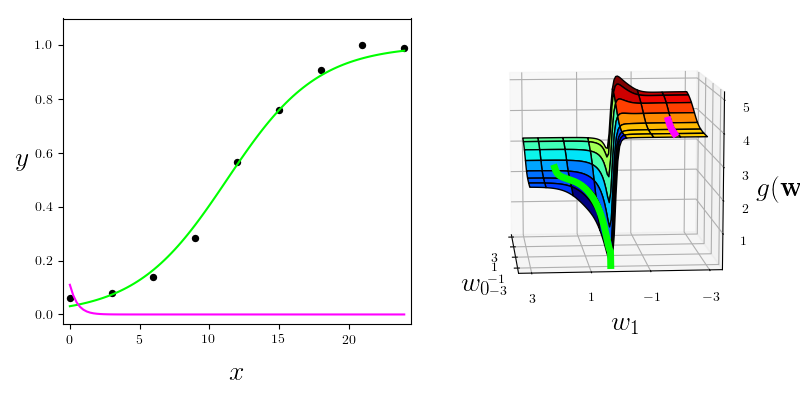
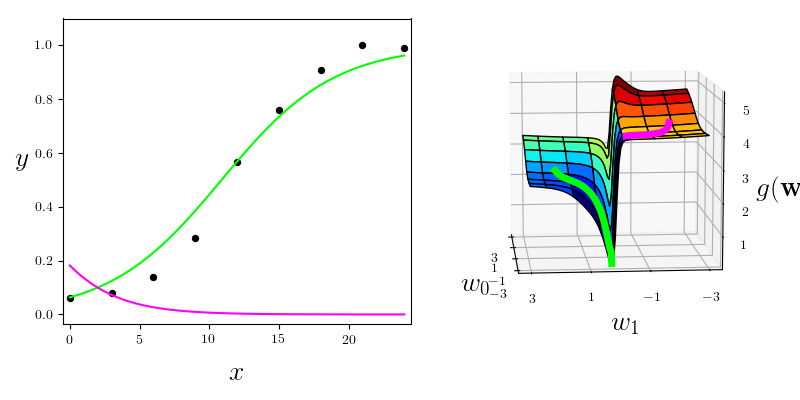
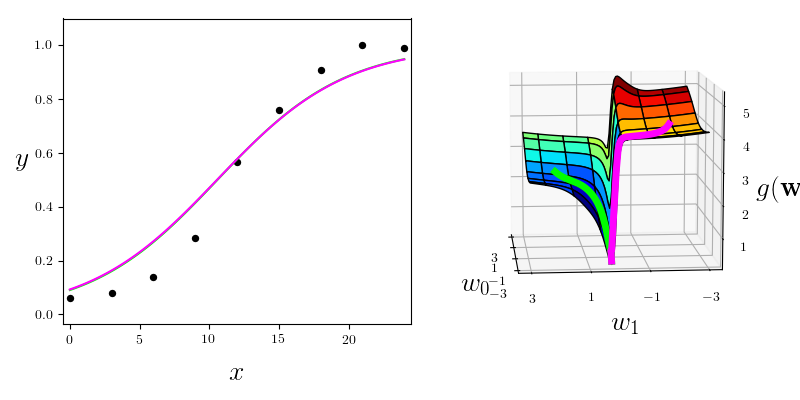
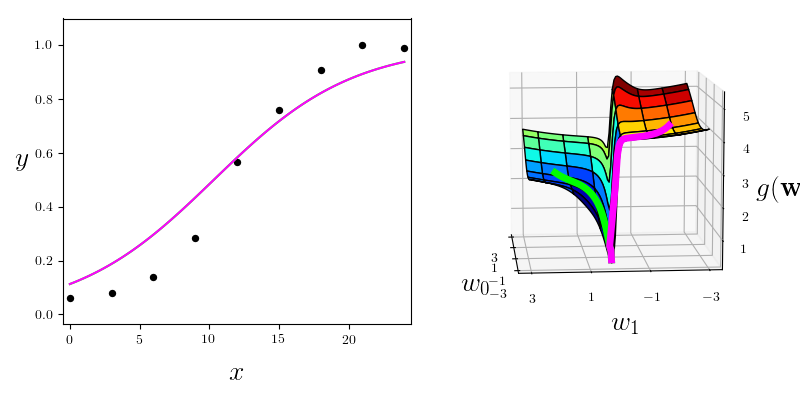
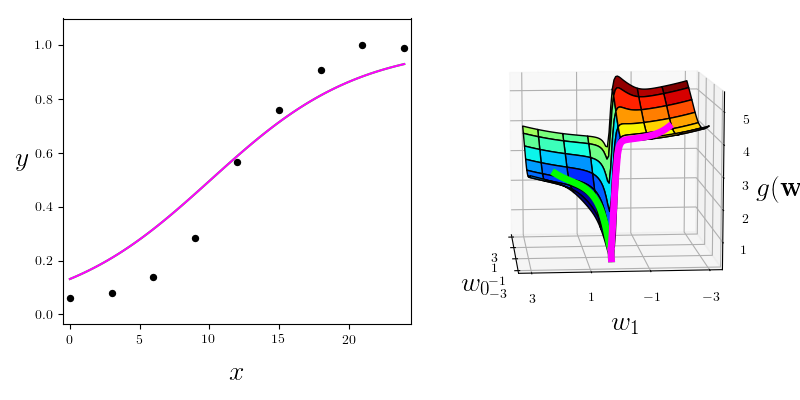
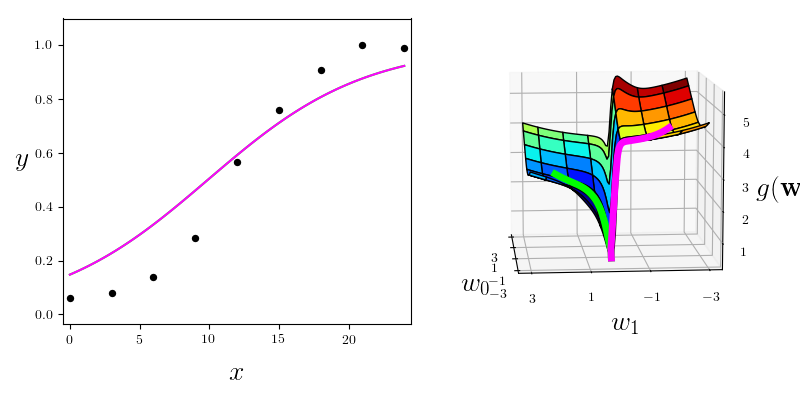
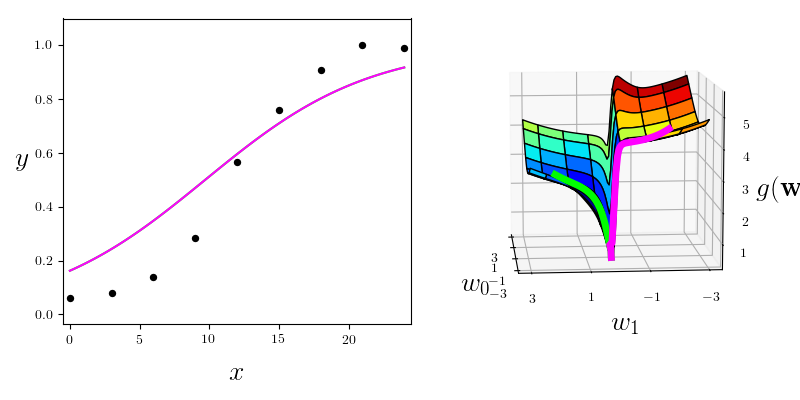
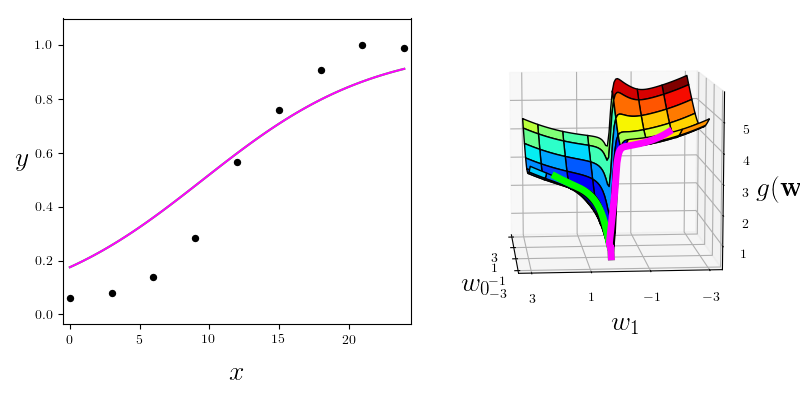
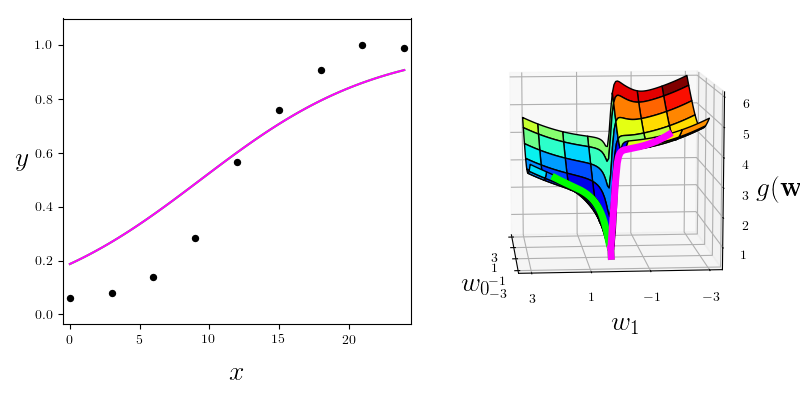
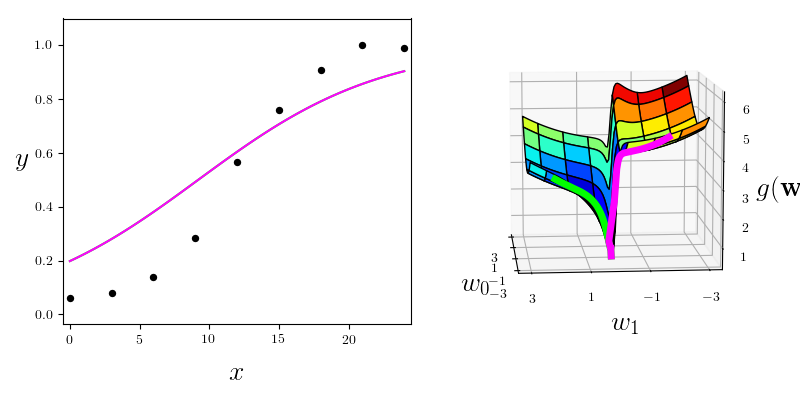

In [16]:
# This code cell will not be shown in the HTML version of this notebook
test = basics_library.regularization.visualizer()

w_init_1 = [0,2]
w_init_2 = [0,-2]
lam_range = 0
max_its = 5000

test.run_example(w_init_1 = w_init_1, w_init_2 = w_init_2, max_its = max_its)